# Kollokasjoner for nøkkelord

In [35]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle
from dask import dataframe as dd

In [2]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [10]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [36]:
ref = dd.read_json('Avisdata/avis_agg.json')

MemoryError: 

In [ ]:
ref.loc[['.',',','og', 'i']]

In [13]:
keyword = 'helse'

In [14]:
filename = 'collocation_' + keyword + ".csv"

In [15]:
try:
    agg = pd.read_csv('agg_' + filename, index_col = 0)
except:
    print('no gikk galt')

In [16]:
agg.head(20)

,1950,1960,1970,1980,1990
!,0.002028,0.001569,0.001349,1.436626e-03,1.475785e-03
"""",0.000928,0.000959,0.000857,6.156971e-04,8.981498e-04
#,0.000088,0.000397,0.000093,6.683976e-05,9.863799e-05
$,0.000035,0.000107,0.000073,2.870682e-05,2.270803e-05
%,0.000185,0.000261,0.000192,2.138016e-04,3.522110e-04
&,0.000438,0.000577,0.000555,3.217735e-04,4.965015e-04
',0.002803,0.002351,0.001902,1.315372e-03,1.435573e-03
(,0.001789,0.002104,0.002907,2.916527e-03,4.085316e-03
),0.001774,0.001868,0.002714,2.789703e-03,3.941498e-03
*,0.002074,0.001554,0.001274,9.850296e-04,1.285605e-03


## Grafstruktur topos

In [23]:
keyword_graph = nb.make_graph(keyword, cutoff = 12)

In [24]:
comm = gnl.community_dict(keyword_graph)

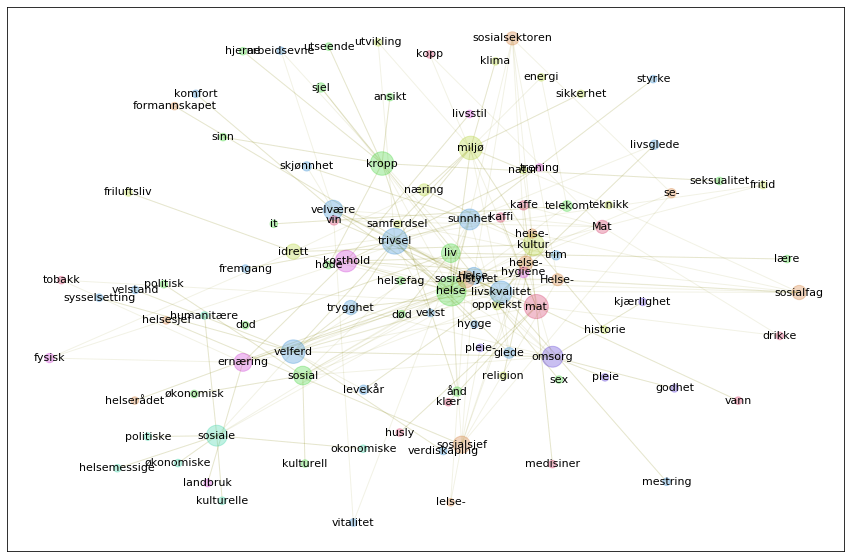

In [25]:
gnl.show_graph(keyword_graph, spread=2.2, fontsize=11)

In [26]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [27]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(i)))

<span style='font-size:1.1em'>omsorg, skjønnhet, kosthold, utvikling, helse-, Helse, velvære, liv, miljø, tobakk, næring, mat, fysisk, arbeidsevne, levekår, idrett, velferd, kultur, sunnhet, hygiene, sosial, sosiale, trygghet, trivsel, glede, ernæring, natur, fritid, livskvalitet, helse, vekst, vitalitet</span>

<span style='font-size:1.1em'>helse, kosthold, ernæring, mat</span>

<span style='font-size:1.1em'>sunnhet, velvære, miljø, trivsel, trygghet, livskvalitet, helse, velferd</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [28]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### miljø-kultur
<span style='font-size:1.1em'>miljø, kultur, idrett, næring, oppvekst, utvikling, sikkerhet, historie, samferdsel, klima, friluftsliv, natur, fritid, religion, teknikk, energi</span>
### helse-kropp
<span style='font-size:1.1em'>helse, kropp, liv, sosial, telekom, ånd, sjel, utseende, politisk, kulturell, hjerne, lære, it, dod, seksualitet, helsefag, ansikt, hode, sinn, død, sex, økonomisk</span>
### sosiale-politiske
<span style='font-size:1.1em'>sosiale, politiske, kulturelle, okonomiske, humanitære, økonomiske, helsemessige</span>
### trivsel-velferd
<span style='font-size:1.1em'>trivsel, velferd, livskvalitet, sunnhet, velvære, Helse, trygghet, glede, skjønnhet, levekår, livsglede, trim, hygge, styrke, fremgang, velstand, sysselsetting, verdiskaping, mestring, arbeidsevne, komfort, vekst, vitalitet</span>
### omsorg-pleie-
<span style='font-size:1.1em'>omsorg, pleie-, godhet, pleie, kjærlighet</span>
### kosthold-ernæring
<span style='font-size:1.1em'>kosthold, ernæring, hygiene, fysisk, livsstil, landbruk, trening</span>
### mat-Mat
<span style='font-size:1.1em'>mat, Mat, vin, kaffe, kaffi, drikke, husly, kopp, medisiner, tobakk, klær, vann</span>
### sosialsjef-sosialstyret
<span style='font-size:1.1em'>sosialsjef, sosialstyret, helse-, sosialfag, sosialsektoren, Helse-, heise-, se-, formannskapet, lelse-, helserådet, helsesjef</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [ ]:
reference = ref

In [ ]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

In [ ]:
barchart(keyword, reference);

# Skip hvis filen `agg_.....csv` allerede er lastet inn

In [ ]:
from time import time

collocations = dict()
step = 1

for i in range(1950, 2000):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

In [ ]:
colls = nb.frame(collocations)

In [ ]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [ ]:
agg = group_frames(colls)

In [ ]:
agg.to_csv('agg_' + filename)

In [ ]:
nb.normalize_corpus_dataframe(agg)

In [ ]:
ref = group_frames(reference)
nb.normalize_corpus_dataframe(ref)

## slutt på skip


# Opptelling

# Sammenligner med en referanse


In [ ]:
ref.sort_values(by=ref.columns[2], ascending=False)[:10].style.background_gradient()

In [31]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.059708,0.060228,0.059670,0.059084,0.057180
og,0.039645,0.045019,0.045641,0.047299,0.049418
",",0.042128,0.041050,0.038261,0.039113,0.044518
i,0.018987,0.018702,0.019523,0.021504,0.021996
for,0.017611,0.017028,0.016063,0.016843,0.019297
er,0.014681,0.013583,0.014494,0.015305,0.014802
til,0.012008,0.011858,0.012320,0.013869,0.013021
som,0.011226,0.011389,0.012282,0.011233,0.010338
av,0.011000,0.010856,0.010521,0.010067,0.009113
på,0.009382,0.011019,0.010014,0.010437,0.009922


In [52]:
ref.columns =  [str(c) for c in ref.columns]

In [72]:
ref['1950']

!       2.217887e-03
"       1.693990e-03
#       1.298063e-04
$       8.286360e-05
%       3.758124e-04
            ...     
ﾫGﾫﾫ    0.000000e+00
ﾻ       0.000000e+00
￥       0.000000e+00
￸       0.000000e+00
�       1.096000e-07
Name: 1950, Length: 8190907, dtype: float64

In [78]:
tempref = pd.concat([agg['1950'].head(50),ref['1950'].head(50)], axis=1)

In [79]:
tempref.head(20)

,1950,1950
!,0.002028,0.002218
"""",0.000928,0.001694
#,0.000088,0.000130
$,0.000035,0.000083
%,0.000185,0.000376
&,0.000438,0.000780
',0.002803,0.004651
(,0.001789,0.003038
),0.001774,0.003711
*,0.002074,0.003373


In [75]:
pmi = pd.DataFrame()
exp = 1.1
for i in agg:
    pmi[i] = agg[i]**exp/(agg[i] + ref[i])

In [76]:
nb.normalize_corpus_dataframe(pmi)

True

<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [77]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
god,7.03217e-05,5.80399e-05,5.18582e-05,3.5709e-05,2.28345e-05
liv,6.18275e-05,5.13642e-05,4.85276e-05,3.48951e-05,2.51334e-05
vitnemål,5.69435e-05,4.4352e-05,2.77105e-05,1.60413e-05,1.25083e-05
barnas,5.63035e-05,4.34626e-05,3.91679e-05,2.48506e-05,1.78691e-05
Søknad,5.60089e-05,4.65782e-05,3.18938e-05,1.85334e-05,1.366e-05
dårlig,5.56795e-05,4.59502e-05,4.12763e-05,2.92459e-05,2.03236e-05
rettkjende,5.54028e-05,4.36407e-05,3.07382e-05,1.03255e-05,4.73715e-06
humør,5.52336e-05,4.5347e-05,3.87299e-05,2.55825e-05,1.78596e-05
God,5.43147e-05,4.55295e-05,4.53635e-05,2.66261e-05,1.69202e-05
attest,5.37156e-05,4.63296e-05,3.81754e-05,2.16668e-05,1.58216e-05


In [80]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
god,7.03217e-05,5.80399e-05,5.18582e-05,3.5709e-05,2.28345e-05
liv,6.18275e-05,5.13642e-05,4.85276e-05,3.48951e-05,2.51334e-05
vitnemål,5.69435e-05,4.4352e-05,2.77105e-05,1.60413e-05,1.25083e-05
barnas,5.63035e-05,4.34626e-05,3.91679e-05,2.48506e-05,1.78691e-05
Søknad,5.60089e-05,4.65782e-05,3.18938e-05,1.85334e-05,1.366e-05
dårlig,5.56795e-05,4.59502e-05,4.12763e-05,2.92459e-05,2.03236e-05
rettkjende,5.54028e-05,4.36407e-05,3.07382e-05,1.03255e-05,4.73715e-06
humør,5.52336e-05,4.5347e-05,3.87299e-05,2.55825e-05,1.78596e-05
God,5.43147e-05,4.55295e-05,4.53635e-05,2.66261e-05,1.69202e-05
attest,5.37156e-05,4.63296e-05,3.81754e-05,2.16668e-05,1.58216e-05


In [81]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(70).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
god,7.03217e-05,5.80399e-05,5.18582e-05,3.5709e-05,2.28345e-05
liv,6.18275e-05,5.13642e-05,4.85276e-05,3.48951e-05,2.51334e-05
opplysning,4.333e-05,4.9304e-05,3.88838e-05,2.08793e-05,1.40643e-05
forberedt,1.02146e-05,4.85772e-05,3.33228e-05,6.70756e-06,5.6878e-06
helseattest,3.67394e-05,4.77936e-05,3.4284e-05,1.40974e-05,1.62966e-05
fremlegge,4.18838e-05,4.70902e-05,3.3637e-05,1.79374e-05,1.13415e-05
Søknad,5.60089e-05,4.65782e-05,3.18938e-05,1.85334e-05,1.366e-05
attest,5.37156e-05,4.63296e-05,3.81754e-05,2.16668e-05,1.58216e-05
og,5.36439e-05,4.61834e-05,4.47737e-05,3.30941e-05,2.52796e-05
sviktende,5.31931e-05,4.59871e-05,4.27951e-05,3.02631e-05,2.08748e-05


In [82]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
god,7.03217e-05,5.80399e-05,5.18582e-05,3.5709e-05,2.28345e-05
liv,6.18275e-05,5.13642e-05,4.85276e-05,3.48951e-05,2.51334e-05
God,5.43147e-05,4.55295e-05,4.53635e-05,2.66261e-05,1.69202e-05
og,5.36439e-05,4.61834e-05,4.47737e-05,3.30941e-05,2.52796e-05
vandel,4.84127e-05,4.49421e-05,4.43163e-05,2.91527e-05,1.87526e-05
trivsel,5.26714e-05,4.54508e-05,4.42881e-05,3.15384e-05,2.19193e-05
sviktende,5.31931e-05,4.59871e-05,4.27951e-05,3.02631e-05,2.08748e-05
psykiske,5.00594e-05,4.29539e-05,4.23068e-05,2.96157e-05,2.10856e-05
kosthold,5.36695e-05,4.33784e-05,4.14688e-05,2.95669e-05,2.00598e-05
fare,5.20761e-05,4.19049e-05,4.12822e-05,3.01904e-05,2.27493e-05


In [83]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
god,7.03217e-05,5.80399e-05,5.18582e-05,3.5709e-05,2.28345e-05
liv,6.18275e-05,5.13642e-05,4.85276e-05,3.48951e-05,2.51334e-05
og,5.36439e-05,4.61834e-05,4.47737e-05,3.30941e-05,2.52796e-05
sosial,3.77885e-05,2.70958e-05,3.68851e-05,3.24108e-05,2.5284e-05
veier,1.37346e-05,1.04287e-05,1.26773e-05,3.19914e-05,1.47216e-05
trivsel,5.26714e-05,4.54508e-05,4.42881e-05,3.15384e-05,2.19193e-05
Flere,1.78426e-05,9.70601e-06,3.13694e-05,3.09815e-05,9.90544e-06
sosialsektoren,0,2.87878e-05,3.92069e-05,3.08235e-05,2.08582e-05
sosiale,3.79233e-05,2.62318e-05,3.69094e-05,3.07064e-05,2.26157e-05
folks,4.87639e-05,4.09151e-05,4.01779e-05,3.05136e-05,2.17911e-05


In [84]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(45).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
miljø,2.44611e-05,2.56074e-05,3.7103e-05,3.02832e-05,2.53879e-05
sosial,3.77885e-05,2.70958e-05,3.68851e-05,3.24108e-05,2.5284e-05
og,5.36439e-05,4.61834e-05,4.47737e-05,3.30941e-05,2.52796e-05
liv,6.18275e-05,5.13642e-05,4.85276e-05,3.48951e-05,2.51334e-05
sikkerhet,4.25433e-05,3.45741e-05,3.52645e-05,2.80033e-05,2.39153e-05
omsorg,3.91409e-05,2.87673e-05,3.23121e-05,2.77903e-05,2.38452e-05
psykisk,4.55057e-05,3.92805e-05,4.12459e-05,2.88058e-05,2.37433e-05
utdanning,5.04965e-05,4.20307e-05,3.71558e-05,2.93507e-05,2.31155e-05
god,7.03217e-05,5.80399e-05,5.18582e-05,3.5709e-05,2.28345e-05
fare,5.20761e-05,4.19049e-05,4.12822e-05,3.01904e-05,2.27493e-05


In [85]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(80).fillna(0).index

Index(['god', 'liv', 'opplysning', 'forberedt', 'helseattest', 'fremlegge',
       'Søknad', 'attest', 'og', 'sviktende', 'dårlig', 'God', 'Søkere',
       'trivsel', 'humør', 'sin', 'gi', 'vandel', 'må', 'alder', 'vitnemål',
       'dråpe', 'sinnets', 'Alder', 'målformer', 'rettkjende', 'velferd',
       'barnas', 'kosthold', 'fysiske', 'avskrifter', 'attestar', 'psykiske',
       'sunnhet', 'Lovfestet', 'mentale', 'legeattest', 'legge', 'hatt',
       'pensjonsordning', 'utdanning', 'attestavskrifter', 'fare', 'behersker',
       'hørsel', 'fysisk', 'skolestyre', 'Sokere', 'svekket', 'bevare',
       'framlegge', 'folks', 'attester', 'sendes', 'innan', 'kreves', 'Soknad',
       'eldres', 'offisielle', 'tilfredsstillende', 'helse', 'Attest', 'melk',
       'ugift', 'anmodning', 'utskrevne', 'kropp', 'grunn', 'Søknader',
       'humor', 'fysikk', 'menneskers', 'leggja', 'skulestyre', 'for',
       'Sinnets', 'være', 'lege', 'realskole', 'fylt'],
      dtype='object')

In [86]:
agg.loc[pmi.sort_values(by=pmi.columns[4], ascending=False).head(50).fillna(0).index].style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
miljø,1.57264e-05,6.38634e-05,0.000543542,0.00111014,0.00331466
sosial,7.6666e-05,5.50978e-05,0.000353171,0.00153946,0.00285601
og,0.0396452,0.0450187,0.0456405,0.0472986,0.0494181
liv,0.00363377,0.00382679,0.00437788,0.00412607,0.00386722
sikkerhet,0.000207391,0.000208495,0.000338729,0.000560854,0.00186726
omsorg,7.07686e-05,5.13411e-05,0.000123413,0.000457595,0.00174189
psykisk,0.000143503,0.000246062,0.000788399,0.000623838,0.00165792
utdanning,0.000395125,0.000584788,0.000573083,0.00104716,0.00172013
god,0.0125084,0.0130494,0.00976341,0.00673411,0.0032411
fare,0.00087871,0.000792657,0.00108512,0.00107072,0.001283


In [87]:
ordliste = 'liv kropp hygiene ernæring idrett arbeidsmiljø livskvalitet risiko omsorg velvære utdanning tjenester og sosial fysisk psykisk syk sykdom sikkerhet'.split()
ord_art = pmi.loc[ordliste]

In [88]:
ordliste 

['liv',
 'kropp',
 'hygiene',
 'ernæring',
 'idrett',
 'arbeidsmiljø',
 'livskvalitet',
 'risiko',
 'omsorg',
 'velvære',
 'utdanning',
 'tjenester',
 'og',
 'sosial',
 'fysisk',
 'psykisk',
 'syk',
 'sykdom',
 'sikkerhet']

In [89]:
pmil = (agg.loc[ordliste]/ref.loc[ordliste]).apply(round)


In [90]:
pmil['translation'] = ['life',
 'body',
 'hygiene',
 'nutrition',
 'sport',
 'work environment',
 'quality of life',
 'risk',
 'caring',
 'wellness',
 'education',
 'services',
 'and',
 'social',
 'physical',
 'psychic',
 'sick',
 'disease',
 'safety']

In [91]:
pmil.fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990,translation
liv,24,29,33,27,23,life
kropp,38,62,23,86,91,body
hygiene,105,46,65,71,50,hygiene
ernæring,34,149,134,291,234,nutrition
idrett,12,9,7,15,23,sport
arbeidsmiljø,0,23,17,29,22,work environment
livskvalitet,0,0,68,103,58,quality of life
risiko,6,9,16,12,9,risk
omsorg,9,5,12,22,64,caring
velvære,69,46,71,136,169,wellness


In [114]:
ordliste2 = 'liv kropp miljø risiko omsorg sosial sikkerhet'.split()

In [115]:
pmil2 = (agg.loc[ordliste2]/ref.loc[ordliste2]).apply(round)

In [116]:
pmil2

,1950,1960,1970,1980,1990
liv,24.0,29.0,33.0,27.0,23.0
kropp,38.0,62.0,23.0,86.0,91.0
miljø,2.0,3.0,11.0,21.0,57.0
risiko,6.0,9.0,16.0,12.0,9.0
omsorg,9.0,5.0,12.0,22.0,64.0
sosial,6.0,4.0,18.0,86.0,154.0
sikkerhet,7.0,7.0,10.0,17.0,50.0


In [117]:
pmil2['translation'] = ['life',
 'body',
 'environment',
 'risk',
 'caring',
 'social',
 'safety']

In [118]:
pmil2.fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990,translation
liv,24,29,33,27,23,life
kropp,38,62,23,86,91,body
miljø,2,3,11,21,57,environment
risiko,6,9,16,12,9,risk
omsorg,9,5,12,22,64,caring
sosial,6,4,18,86,154,social
sikkerhet,7,7,10,17,50,safety


In [ ]:
words = : “environment”, “social”, “life”, “body”, “security”, “risk”, and “care”

In [94]:
from pandas.plotting import table

In [92]:
agg.loc[ordliste].style.bar(axis=1)

,1950,1960,1970,1980,1990
liv,0.00363377,0.00382679,0.00437788,0.00412607,0.00386722
kropp,0.000184785,0.000276115,0.000126039,0.000669255,0.000980466
hygiene,0.000216237,0.000140875,0.00015164,0.000125967,8.91763e-05
ernæring,6.38883e-05,0.000128353,0.000326913,0.000336341,0.000278646
idrett,0.000141537,0.000134614,0.00011094,0.000314061,0.000386036
arbeidsmiljø,0,1.75311e-05,0.000105032,0.000222799,0.000226607
livskvalitet,0,0,1.50984e-05,9.76889e-05,0.000191126
risiko,5.20936e-05,7.38811e-05,0.000111597,8.69774e-05,9.24879e-05
omsorg,7.07686e-05,5.13411e-05,0.000123413,0.000457595,0.00174189
velvære,0.000222135,0.00017719,0.000177242,0.000195378,0.000268002


In [93]:
pmi.to_csv(filename)

In [ ]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [ ]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

In [ ]:
freq_assoc_val(agg, pmi, 0)

In [ ]:
freq_assoc_val(agg, pmi, 1)

In [ ]:
freq_assoc_val(agg, pmi, 3)

In [ ]:
freq_assoc_val(agg, pmi, 4)

In [ ]:
freq_assoc_val(agg, pmi, 1)

In [ ]:
freq_assoc_val(pmi, pmi, 2)

In [ ]:
freq_assoc_val(pmi, pmi, 3)

In [ ]:
freq_assoc_val(pmi, pmi, 4)

In [ ]:
freq_assoc_val(pmi, pmi, 0)

In [ ]:
freq_assoc_val(pmi, pmi, 0)

In [ ]:
freq_assoc_val(pmi, pmi, 0)

In [ ]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [ ]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [ ]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

# Hvordan utvikler ordene seg?

In [ ]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

In [ ]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

In [ ]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

In [ ]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

In [ ]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [ ]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

In [ ]:
commchart(2, (0,5));

In [ ]:
commchart(1, (3, 8))

In [ ]:
commchart(3)